In [19]:
# 魔术命令
%load_ext autoreload
%autoreload 2

import os
os.chdir("/home/handb/Project/HZTourism")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import pandas as pd

base_dir = "data/0411/res/res_test/14100/288"

In [21]:
def get_groups(base_dir, dir_name):
    df_mode0 = pd.read_csv(f"{base_dir}/0/{dir_name}/result.csv")
    df_mode1 = pd.read_csv(f"{base_dir}/1/{dir_name}/result.csv")
    df_mode0["time"] = pd.to_datetime(df_mode0["time"])
    df_mode1["time"] = pd.to_datetime(df_mode1["time"])
    df_mode0.sort_values(by="time", inplace=True)
    df_mode1.sort_values(by="time", inplace=True)
    df_mode0_far = df_mode0[(df_mode0.index + 1) % 24 == 0]
    df_mode1_far = df_mode1[(df_mode1.index + 1) % 24 == 0]
    df_mode = pd.concat([df_mode0_far, df_mode1_far], ignore_index=True)
    df_mode = df_mode.sort_values(by="time")
    groups_mode = list(df_mode.groupby(df_mode["time"].dt.date))
    return groups_mode

In [22]:
groups_ogn = get_groups(base_dir, "")
groups_a = get_groups(
    base_dir,
    "Flow_288_24_Koopa_Flow_ftS_sl288_pl24_segl48_dyna128_h64_l2_nb3_a0.3_test_0",
)
groups_nb = get_groups(
    base_dir,
    "Flow_288_24_Koopa_Flow_ftS_sl288_pl24_segl48_dyna128_h64_l2_nb4_a0.2_test_0",
)

groups_l = get_groups(
    base_dir,
    "Flow_288_24_Koopa_Flow_ftS_sl288_pl24_segl48_dyna128_h64_l3_nb3_a0.2_test_0",
)
groups_h = get_groups(
    base_dir,
    "Flow_288_24_Koopa_Flow_ftS_sl288_pl24_segl48_dyna128_h128_l2_nb3_a0.2_test_0",
)
groups_dyna = get_groups(
    base_dir,
    "Flow_288_24_Koopa_Flow_ftS_sl288_pl24_segl48_dyna256_h64_l2_nb3_a0.2_test_0",
)

In [24]:
from Loss.PearsonMSELoss import pearson_mse_loss_xgb_test


def get_loss(*groups_mode):
    loss_list = []
    # 对于每一个groups_mode, 计算loss
    for groups in groups_mode:
        loss_temp = []
        for date, group in groups:
            loss_temp.append(
                pearson_mse_loss_xgb_test(group["pred"].values, group["real"].values)
            )
        loss_list.append(loss_temp)
    return loss_list

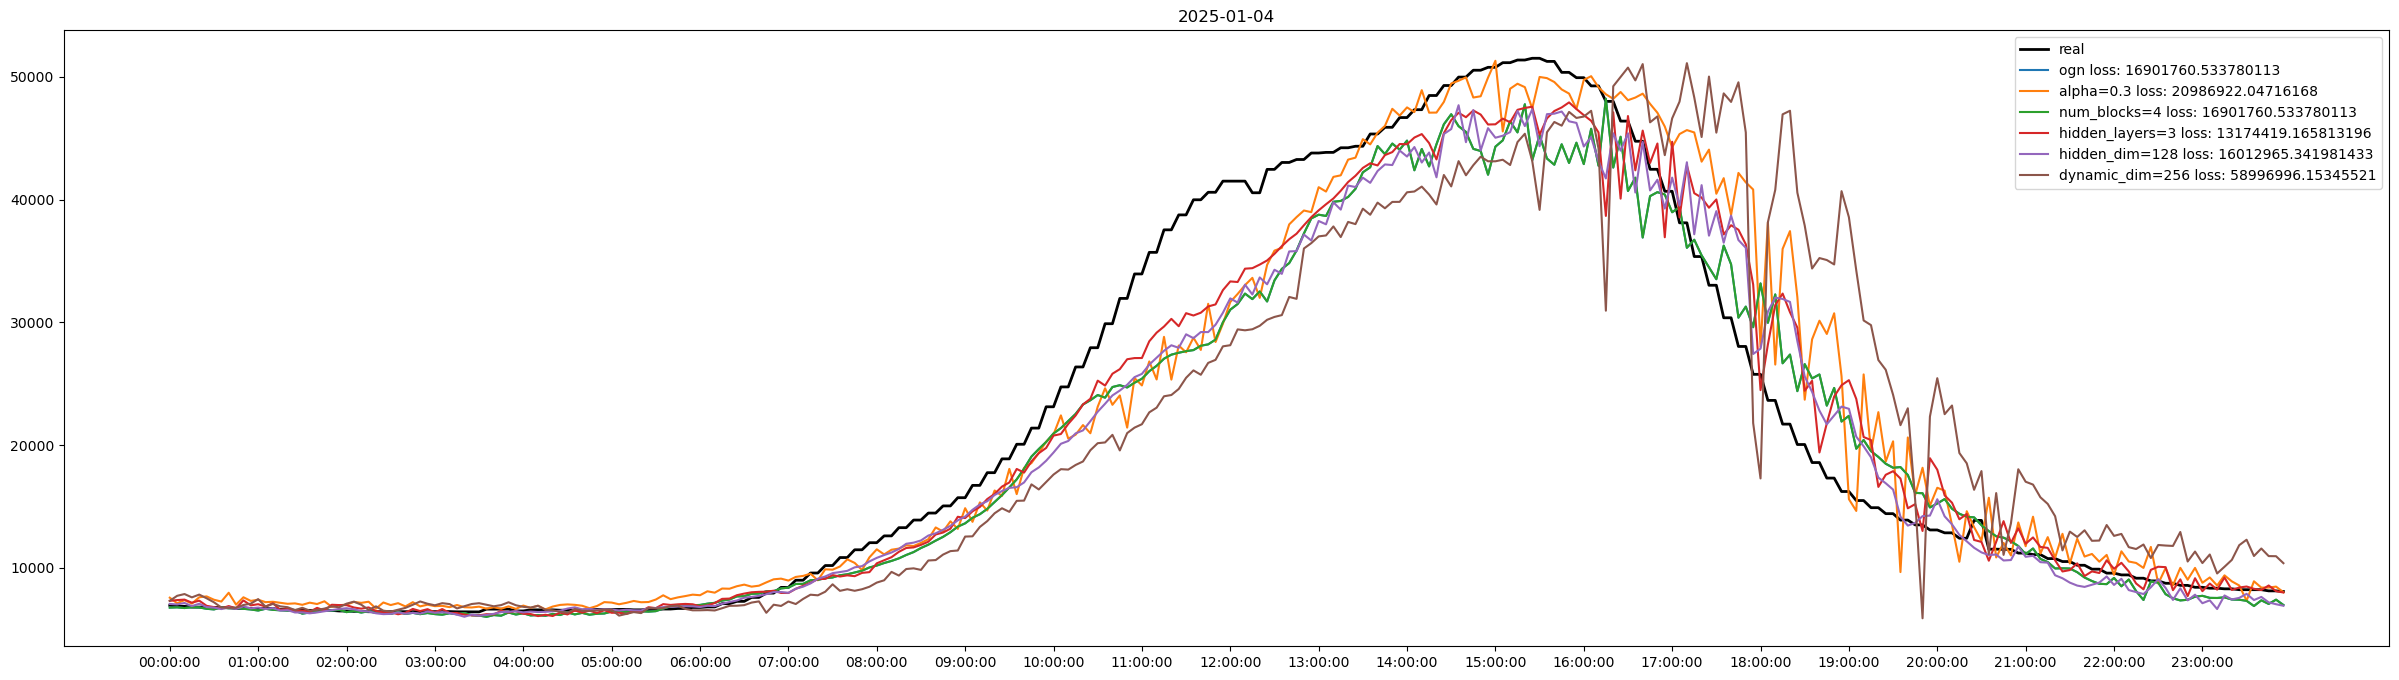

In [30]:
from utils_data.utils_data import interactive_plot_comparison

args = [groups_ogn, groups_a, groups_nb, groups_l, groups_h, groups_dyna]
# args = [groups_ogn, groups_l]
loss_list = get_loss(*args)
modes_name = [
    "ogn",
    "alpha=0.3",
    "num_blocks=4",
    "hidden_layers=3",
    "hidden_dim=128",
    "dynamic_dim=256",
]
interactive_plot_comparison(modes_name, loss_list, *args)